In [7]:
# Calculate and display training accuracy and classification report

y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
training_report = classification_report(y_train, y_train_pred, target_names=[str(c) for c in le.classes_])

print(f"\nModel Training Accuracy: {training_accuracy:.4f}")
print("\nTraining Classification Report:")
print(training_report)


Model Training Accuracy: 0.6831

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.84      0.72       185
         1.0       0.34      0.20      0.25       158
         2.0       0.80      0.80      0.80       386

    accuracy                           0.68       729
   macro avg       0.59      0.62      0.59       729
weighted avg       0.66      0.68      0.66       729



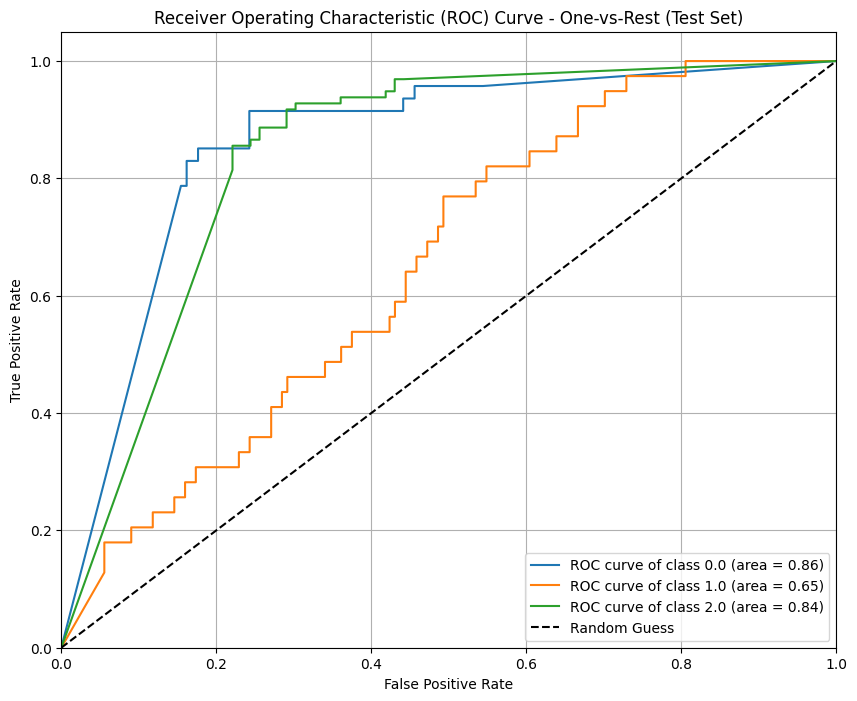

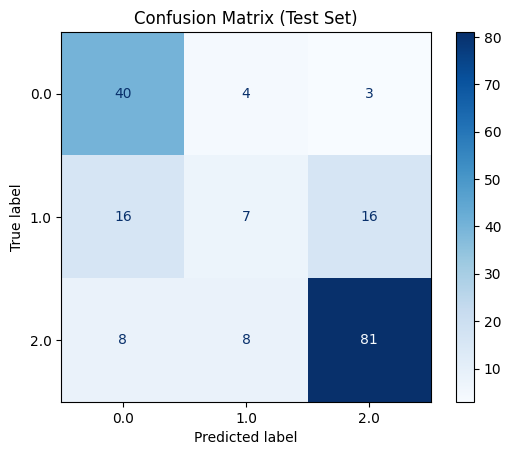

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import numpy as np

# --- Plotting ROC Curve (One-vs-Rest for Multi-class) ---

# Get predicted probabilities for each class for the test set
y_score = model.predict_proba(X_test)

# Binarize the true labels for ROC calculation
n_classes = len(le.classes_)
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {le.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- Plotting Confusion Matrix ---

# Get the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load features and labels from .npy files
X_data = np.load('/content/X.npy')
y_data = np.load('/content/y.npy')

# Encode the target variable (y_data)
le = LabelEncoder()
y_encoded = le.fit_transform(y_data)

# Create the Naive Bayes model pipeline
# GaussianNB is suitable for continuous numerical data
model = Pipeline(steps=[
    ('scaler', StandardScaler()), # Scale features for GaussianNB
    ('classifier', GaussianNB())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train the model
print("\nTraining Naive Bayes model...")
model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Convert class labels to string for classification_report
target_names_str = [str(c) for c in le.classes_]
report = classification_report(y_test, y_pred, target_names=target_names_str)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


Training Naive Bayes model...
Model training complete.

Model Accuracy: 0.6995

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.85      0.72        47
         1.0       0.37      0.18      0.24        39
         2.0       0.81      0.84      0.82        97

    accuracy                           0.70       183
   macro avg       0.60      0.62      0.59       183
weighted avg       0.67      0.70      0.67       183

